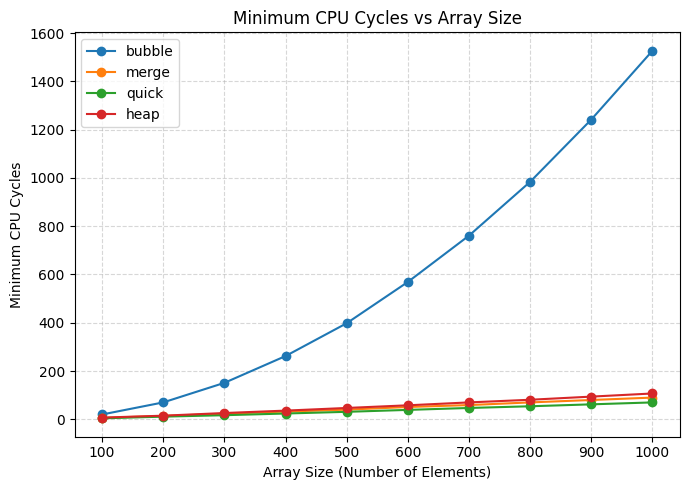

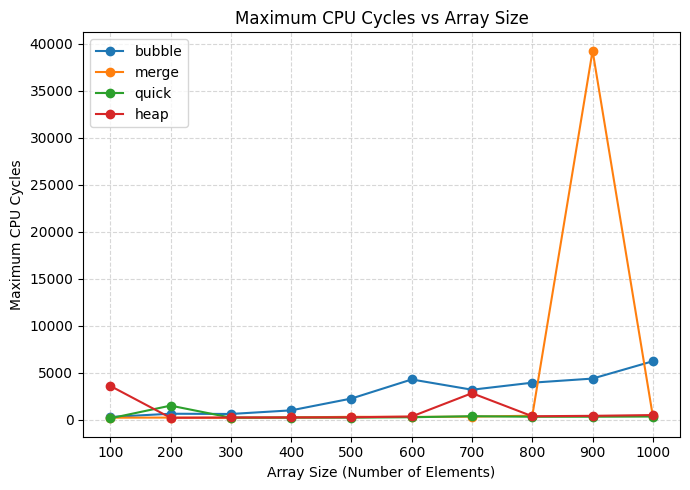

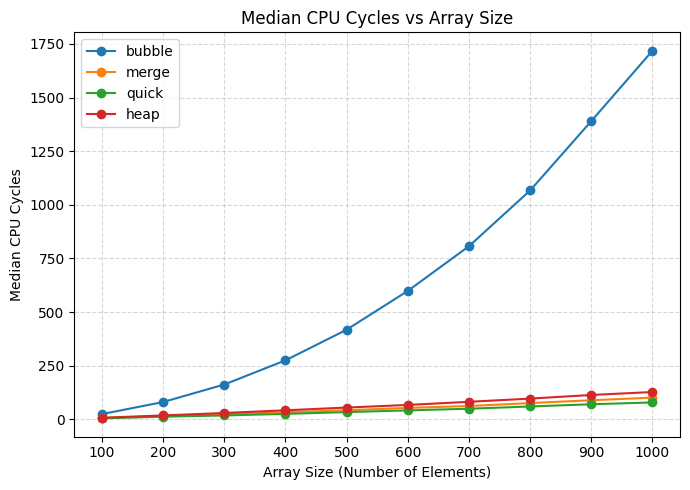

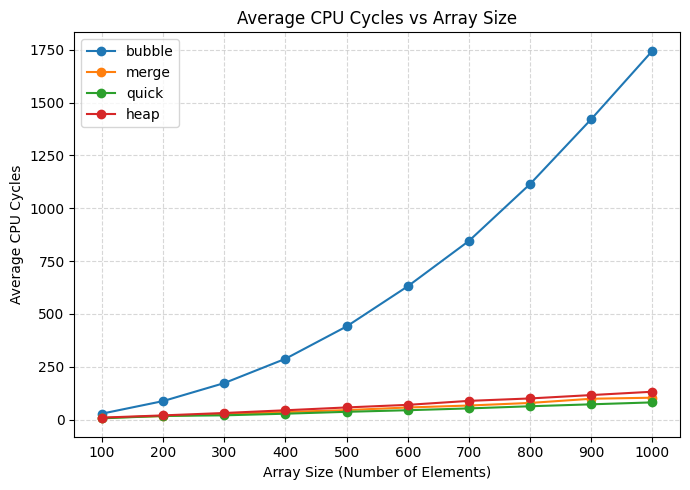

In [ ]:
import matplotlib.pyplot as plt

# Data from the CSV-like input
sizes = [100,200,300,400,500,600,700,800,900,1000]

data = {
    'bubble': {
        'min': [20,70,151,262,398,569,761,984,1242,1527],
        'max': [281,625,600,985,2244,4274,3181,3931,4368,6215],
        'median': [24.70,81.10,162.60,275.20,418.10,598.90,807.20,1067.10,1390.40,1718.40],
        'avg': [27.97,87.40,172.62,287.60,440.76,630.78,845.47,1114.84,1421.92,1745.57]
    },
    'merge': {
        'min': [6,14,23,32,40,51,59,70,80,90],
        'max': [205,216,186,239,295,287,315,417,39266,346],
        'median': [7.10,14.80,23.80,33.20,42.60,53.70,62.50,76.00,89.40,101.40],
        'avg': [8.19,16.65,25.89,35.65,44.79,57.11,66.40,78.62,98.47,103.45]
    },
    'quick': {
        'min': [4,11,17,24,31,39,47,54,62,70],
        'max': [135,1488,209,212,211,252,364,303,308,327],
        'median': [5.00,12.70,18.40,25.80,34.00,42.10,49.80,60.30,70.70,79.10],
        'avg': [5.74,17.14,19.96,27.75,36.61,44.15,52.79,62.91,72.12,81.27]
    },
    'heap': {
        'min': [7,15,26,36,47,58,70,81,94,107],
        'max': [3585,193,226,228,245,332,2814,358,402,484],
        'median': [7.70,18.60,30.00,42.40,55.30,67.40,82.10,97.00,113.90,127.70],
        'avg': [9.06,19.67,31.07,43.92,57.36,69.59,88.40,99.91,115.91,131.70]
    }
}

# Plot configurations
metrics = ['min', 'max', 'median', 'avg']
titles = {
    'min': 'Minimum CPU Cycles vs Array Size',
    'max': 'Maximum CPU Cycles vs Array Size',
    'median': 'Median CPU Cycles vs Array Size',
    'avg': 'Average CPU Cycles vs Array Size'
}
ylabels = {
    'min': 'Minimum CPU Cycles',
    'max': 'Maximum CPU Cycles',
    'median': 'Median CPU Cycles',
    'avg': 'Average CPU Cycles'
}

for metric in metrics:
    plt.figure(figsize=(7, 5))
    for sort in data:
        plt.plot(sizes, data[sort][metric], marker='o', label=sort)
    plt.title(titles[metric])
    plt.xlabel("Array Size (Number of Elements)")
    plt.ylabel(ylabels[metric])
    plt.xticks(ticks=range(100, 1001, 100))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


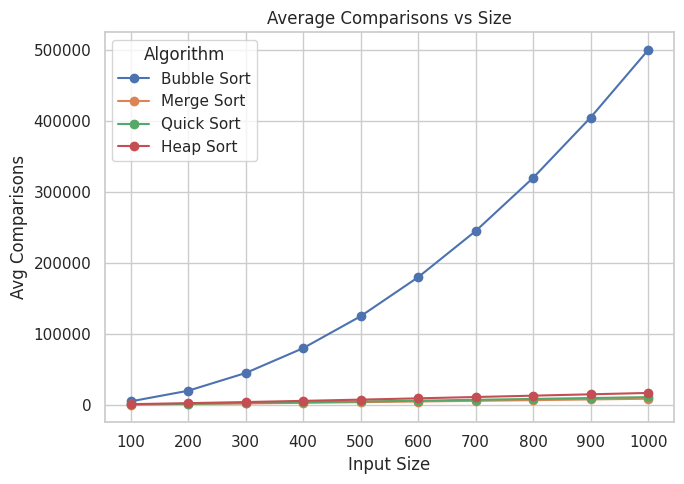

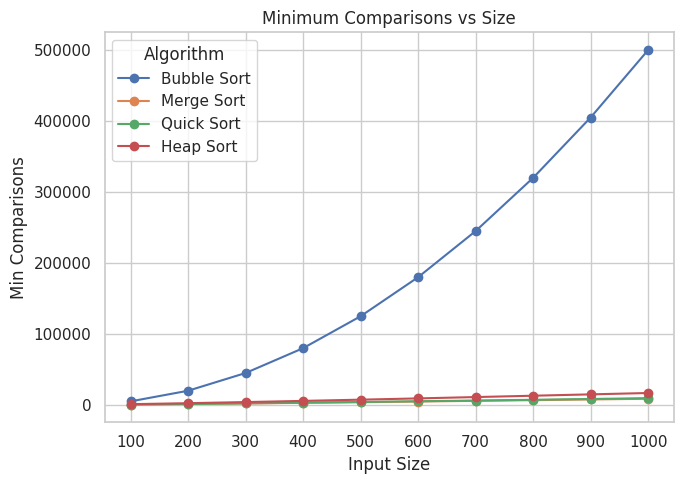

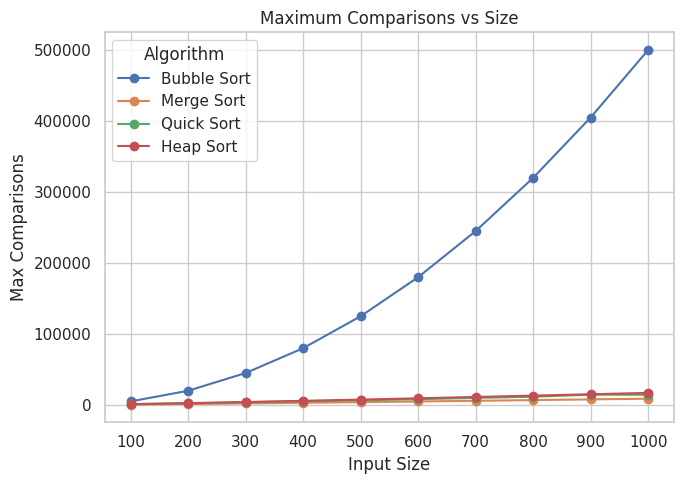

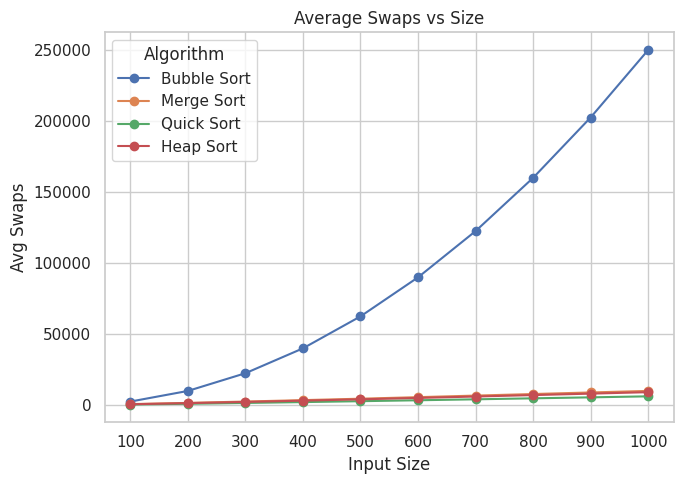

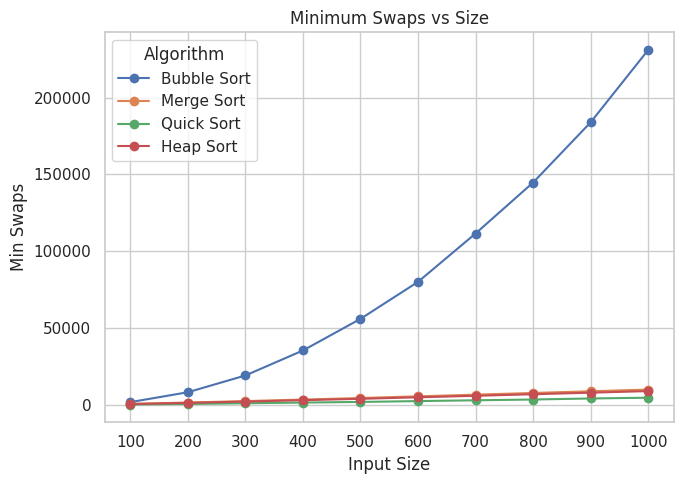

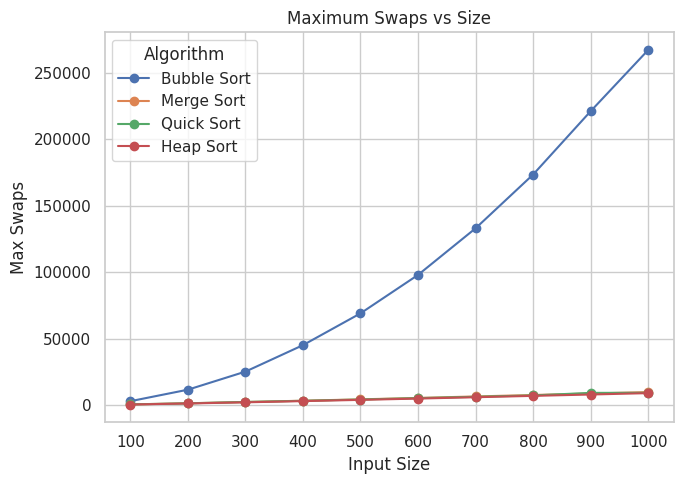

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('edited_results.csv')

# Set plot style
sns.set(style="whitegrid")

# Sort sizes for consistent x-axis ticks
sizes = sorted(df['Size'].unique())

# Define a function to plot a given metric
def plot_metric(metric, title):
    plt.figure(figsize=(7, 5))
    for algo in df['Algorithm'].unique():
        subset = df[df['Algorithm'] == algo]
        plt.plot(subset['Size'], subset[metric], marker='o', label=algo)
    plt.xlabel('Input Size')
    plt.ylabel(metric.replace('_', ' '))
    plt.title(title)
    plt.legend(title='Algorithm')
    plt.xticks(sizes)
    plt.tight_layout()
    plt.show()

# Plot all 6 required metrics
plot_metric('Avg_Comparisons', 'Average Comparisons vs Size')
plot_metric('Min_Comparisons', 'Minimum Comparisons vs Size')
plot_metric('Max_Comparisons', 'Maximum Comparisons vs Size')
plot_metric('Avg_Swaps', 'Average Swaps vs Size')
plot_metric('Min_Swaps', 'Minimum Swaps vs Size')
plot_metric('Max_Swaps', 'Maximum Swaps vs Size')


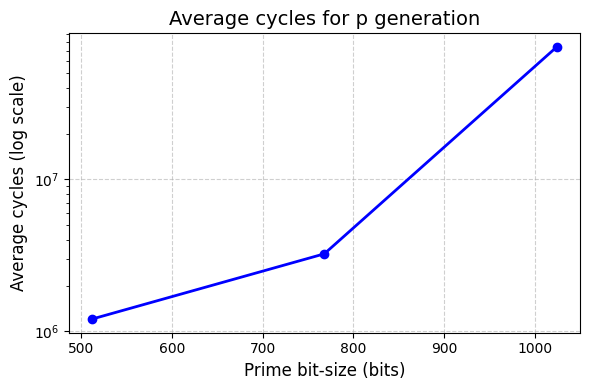

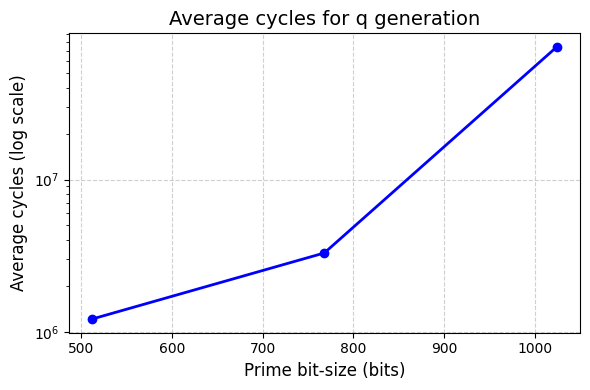

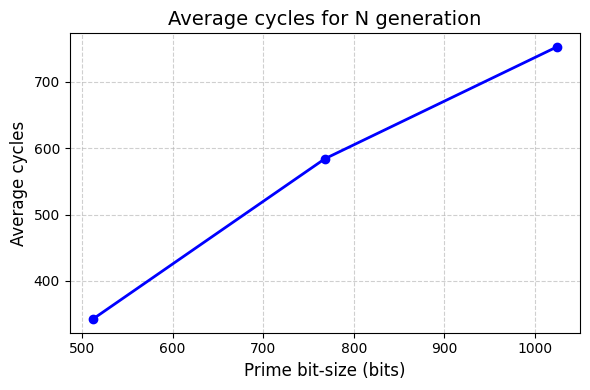

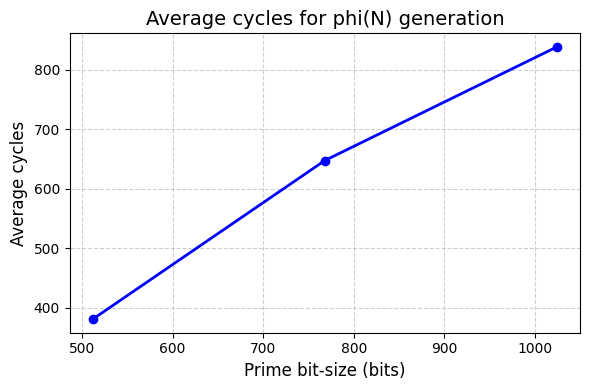

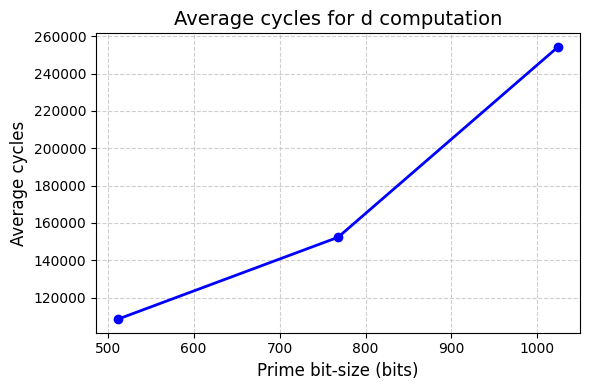

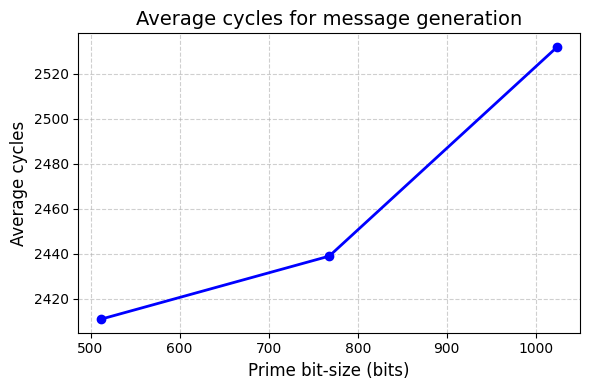

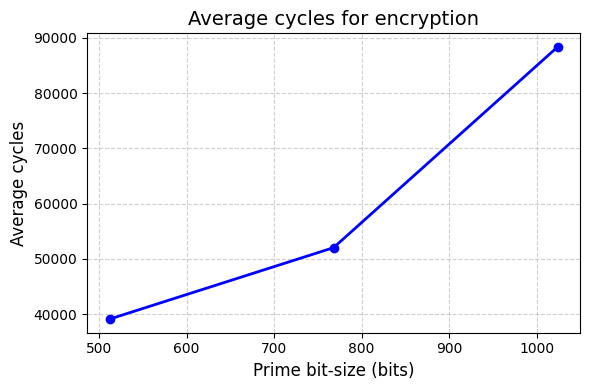

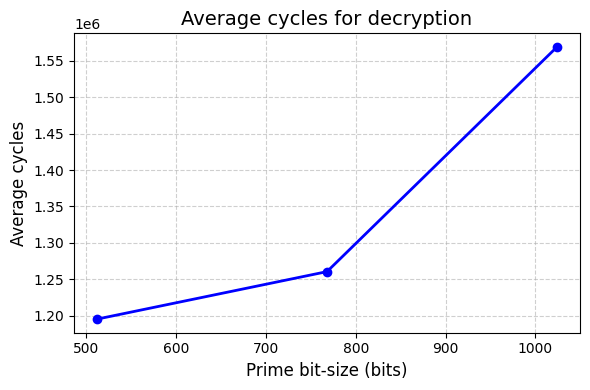

In [ ]:
import matplotlib.pyplot as plt

# --- Data ---
bits = [512, 768, 1024]

avg_p_gen    = [1203478.96, 3234567.72, 74264567.87]
avg_q_gen    = [1210123.47, 3291289.39, 74312012.11]
avg_N_mul    = [342.44, 584.12, 752.73]
avg_phi      = [381.22, 647.33, 837.88]
avg_d_compute= [108456, 152304, 254311]
avg_msg_gen  = [2411, 2439, 2532]
avg_enc      = [39123.66, 52047.85, 88347.42]
avg_dec      = [1195213.59, 1260438.42, 1569023.87]

metrics = {
    "p generation": avg_p_gen,
    "q generation": avg_q_gen,
    "N generation": avg_N_mul,
    "phi(N) generation": avg_phi,
    "d computation": avg_d_compute,
    "message generation": avg_msg_gen,
    "encryption": avg_enc,
    "decryption": avg_dec
}

# --- Plotting ---
for metric_name, values in metrics.items():
    plt.figure(figsize=(6,4))
    plt.plot(bits, values, marker='o', color='blue', linewidth=2)
    plt.title(f"Average cycles for {metric_name}", fontsize=14)
    plt.xlabel("Prime bit-size (bits)", fontsize=12)
    plt.ylabel("Average cycles", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Use log scale if values vary a lot
    if max(values) / min(values) > 50:
        plt.yscale('log')
        plt.ylabel("Average cycles (log scale)", fontsize=12)

    plt.tight_layout()
    plt.show()  # This will display each graph one after another
